In [1]:
%matplotlib notebook

from combine.philip_zb_w7xt_version2 import gen_grid
from matplotlib import cm, pyplot as plt
import ipywidgets as widgets
import numpy as np

from combine.quick_g import multi_bump
import combine.grid_analyze_version2 as ga

In [2]:
def widget_g_plot_exp(g, g2, phi=-1, title=None, widget=False, sharex=True, sharey=True):
    fig, (ax, ax2) = plt.subplots(figsize=(9.5,8), ncols=2, sharex=True, sharey=True)
    ax.set_aspect("equal"); ax2.set_aspect("equal")
    
    def g_plot(phi):
        ax.clear()
        # ax.set_title("Equal Spacing")
        ax.set_title("Grid 1")
        R, z, _ = np.transpose(g[:,:,phi,:], (2,0,1))
        ax.plot(R[:,::10], z[:,::10], c="blue", lw=.7, zorder=100)
        # ax.plot(R.T[:,::10], z.T[:,::10], c="red", lw=.7, zorder=100)
        ax.plot(R,z, c="C0", lw=0.3, zorder=101)
        ax.plot(R.T,z.T, c="red", lw=0.3, zorder=101)
        ax.plot(R.T[0], z.T[0], c="darkblue", lw=1, zorder=102)
        ax2.clear()
        # ax2.set_title("Rescaled Spacing")
        ax2.set_title("Grid 2")
        R, z, _ = np.transpose(g2[:,:,phi,:], (2,0,1))
        ax2.plot(R[:,::10], z[:,::10], c="blue", lw=.7, zorder=100)
        # ax2.plot(R.T[:,::10], z.T[:,::10], c="red", lw=.7, zorder=100)
        ax2.plot(R,z, c="C0", lw=0.3, zorder=101)
        ax2.plot(R.T,z.T, c="red", lw=0.3, zorder=101)
        ax2.plot(R.T[0], z.T[0], c="darkblue", lw=1, zorder=102)
        fig.tight_layout()
    
    phi = widgets.IntSlider(min=0, max=g.shape[2]-1, value=0, step=1)
    widgets.interact(g_plot, phi = phi)

In [3]:
constants = {"NirS": 5, "NirC": 5, "NirN": 10,  # in -> outside cell number 
             "Niphalf": 100, # half pol cell number
             "eq_space": True, "eq_space_vessel": True, "Nit": 37,
             "zoidpol": True, "trace_angle": 10, # angle is int in [0,36]
             "center_delta_R": .15}

# shift spacings around
size = constants["Niphalf"]*2+1, constants["Nit"]
scales_mus_covs = [
    [ 0.4,  [0.1 ,0   ], [[15,0],[0,10]]],
    [-0.45, [0.35,0   ], [[25,0],[0,10]]],
    [-0.25, [0.85,0   ], [[10,0],[0,10]]],
    [ 0.2,  [0.1 ,0.2 ], [[10,0],[0,10]]],
    [-0.15, [0.7 ,0.4 ], [[35,0],[0,10]]], 
    [0.5,   [1   ,0.45], [[5,0],[0,13]]],
    [0.1,   [0.7 ,0   ], [[5,0],[0,5]]],
    [-0.1,  [1   ,0   ], [[10,0],[0,5]]],
    [0.3,   [0.05,0.55], [[20,-15],[-15,30]]],
    [0.3,   [0   ,0.65], [[15,0],[0,5]]],
    [0.2,   [0   ,0.75], [[10,0],[0,15]]],
    [-0.4,  [0.2 ,0.45], [[5,0],[0,10]]],
    [-0.5,  [0.20, 0.65],[[8,0],[0,10]]],
    [-0.4,  [0.20,0.65], [[5,0],[0,5]]],
    [0.2,   [0.34,0.65], [[5,0],[0,5]]],
    [0.2,   [0.30,0.66], [[5,0],[0,5]]],
    [-0.5,  [0.24,0.85], [[5,0],[0,5]]],
    [0.2,   [0.34,0.85], [[5,0],[0,5]]],
    [0.2,   [0.30,0.86], [[5,0],[0,5]]],
    [-0.3,  [0.8,0.65],  [[30,0],[0,10]]],
    [0.1,   [0.7,0.85],  [[20,0],[0,10]]],
    [-0.15, [0.85,0.85], [[20,0],[0,10]]],    
    [0.1,   [0.35,0.95], [[20,0],[0,10]]],
    [-0.1,  [0.85,0.95], [[20,0],[0,10]]],   
    [0.6,   [0   ,1   ], [[20,0],[0,10]]],    
    [-0.6,  [0.25,1   ], [[20,0],[0,10]]],
    [0.4,   [0.4 ,1   ], [[10,0],[0,10]]],
    [0.6,   [0.45,1   ], [[10,0],[0,10]]],
]
        
#if True:
#    constants["vessel_pdf"] = multi_bump(size)
#    g1 = gen_grid(constants)

# constants["vessel_pdf"] = multi_bump(size, scales_mus_covs)
# g2 = gen_grid(constants)
# constants["zoidpol"] = False
# g1 = gen_grid(constants)

g1 = gen_grid(constants)
constants["vessel_pdf"] = multi_bump(size, scales_mus_covs)
g2 = gen_grid(constants)

File: W7X-VacuumVessel-Medium.kis
Kisslinger mesh with 21 Phi values with 73 R,Z values per phi.
5-fold periodicity
Reference point: 0.000000 [cm] 0.000000 [cm] (R,Z)
File: W7X-VacuumVessel-Medium.kis
Kisslinger mesh with 21 Phi values with 73 R,Z values per phi.
5-fold periodicity
Reference point: 0.000000 [cm] 0.000000 [cm] (R,Z)


<IPython.core.display.Javascript object>


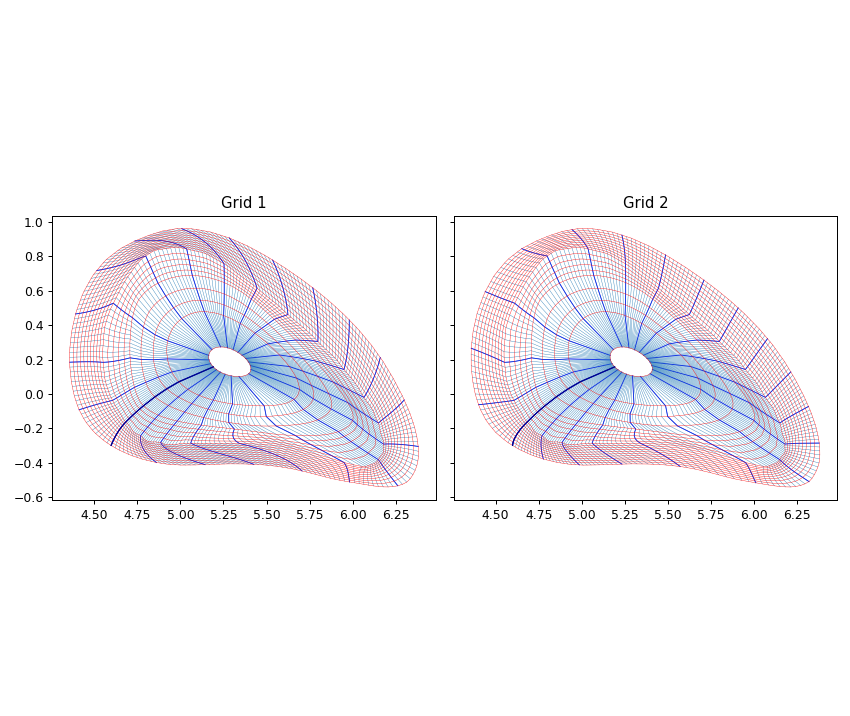

interactive(children=(IntSlider(value=0, description='phi', max=36), Output()), _dom_classes=('widget-interact…

In [4]:
widget_g_plot_exp(g1, g2, phi=0, widget=True)